<a href="https://colab.research.google.com/github/harsh-bat/tensorFlow2Learn/blob/master/Spam_Detection_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding
from tensorflow.keras.models import Model

In [2]:
!wget -nc https://lazyprogrammer.me/course_files/spam.csv

--2020-09-15 05:53:54--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.31.81.48, 172.67.213.166, 104.31.80.48, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.31.81.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K  --.-KB/s    in 0.03s   

2020-09-15 05:53:54 (16.4 MB/s) - ‘spam.csv’ saved [503663/503663]



In [3]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [4]:
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [5]:
df.columns = ['labels', 'data']

In [6]:
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
Y = df['b_labels'].values

In [7]:
df_train, df_test, Ytrain, Ytest = train_test_split(df['data'], Y, test_size=0.33)

In [9]:
MAX_VOCAB_SIZE = 200000
tokenizer = Tokenizer(num_words = MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test = tokenizer.texts_to_sequences(df_test)

In [11]:
V = len(tokenizer.word_index) + 1

In [12]:
V

7241

In [13]:
data_train = pad_sequences(sequences_train)

In [19]:
T = data_train.shape[1]
T

189

In [20]:
data_test = pad_sequences(sequences_test, maxlen=T)

In [21]:
data_test.shape

(1839, 189)

In [22]:
#Now we have data in shape N x T
# To have the shape of N x T x D we use embedding
# T will be the spatial feature (imagine W or H for images. Bt only 1D instead of 2)
# D will be the number of filters. Imagine C for images. C is the number of filters. For us C will be D. ir dimensions from embeddings. Imagine 300 in word2vec


In [23]:
D = 20 

i = Input(shape=(T,))
x = Embedding(V, D)(i)
x = Conv1D(32, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(64, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(128, 3, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)

In [24]:
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [25]:
r = model.fit(
  data_train,
  Ytrain,
  epochs=5,
  validation_data=(data_test, Ytest)
)

Epoch 1/5
117/117 [==============================] - 1s 9ms/step - loss: 0.3273 - accuracy: 0.8848 - val_loss: 0.1528 - val_accuracy: 0.9511
Epoch 2/5
117/117 [==============================] - 1s 6ms/step - loss: 0.0511 - accuracy: 0.9845 - val_loss: 0.0822 - val_accuracy: 0.9734
Epoch 3/5
117/117 [==============================] - 1s 6ms/step - loss: 0.0140 - accuracy: 0.9957 - val_loss: 0.0716 - val_accuracy: 0.9826
Epoch 4/5
117/117 [==============================] - 1s 7ms/step - loss: 0.0043 - accuracy: 0.9992 - val_loss: 0.0813 - val_accuracy: 0.9837
Epoch 5/5
117/117 [==============================] - 1s 7ms/step - loss: 0.0026 - accuracy: 0.9995 - val_loss: 0.0833 - val_accuracy: 0.9864


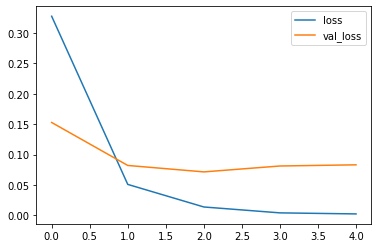

In [26]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

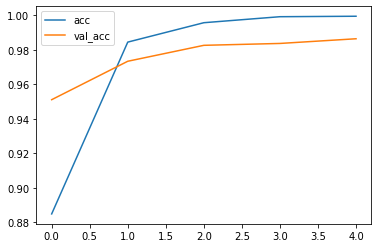

In [27]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()